  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  575k  100  575k    0     0  2423k      0 --:--:-- --:--:-- --:--:-- 2430k
Dimensões da imagem: 850x1920, Canais: 3


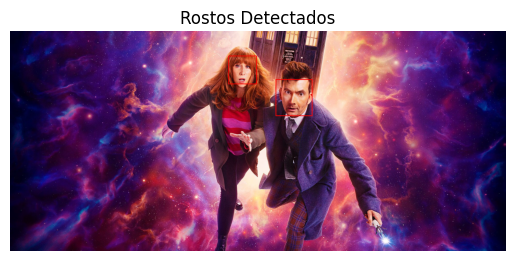

In [4]:
# 1. curl para evitar o bloqueio do Imgur no Colab
!curl -L "https://i.imgur.com/BZ8p9hn.jpeg" -o dw.jpg

import cv2
import matplotlib.pyplot as plt

# Carregar o classificador Haar Cascade para detecção de rosto
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Ler a imagem do disco
image = cv2.imread('dw.jpg')

# Verificar as dimensões da imagem
height, width, channels = image.shape
print(f"Dimensões da imagem: {height}x{width}, Canais: {channels}")

# --- [CONCLUSÃO 1: Carregamento e Análise] ---
# A imagem foi carregada com sucesso e verificamos suas dimensões.
# Essa verificação é importante para saber se a resolução é adequada para o processamento
# e confirmar que a imagem possui 3 canais de cor (necessário para as conversões seguintes).

# Converter a imagem de BGR para RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Converter a imagem para Escala de Cinza
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# --- [CONCLUSÃO 2: Conversão de Cores] ---
# O OpenCV carrega imagens nativamente no padrão BGR. A conversão para RGB foi
# realizada para manipular a imagem no espaço de cor correto para exibição.
# Além disso, realizou-se a conversão da imagem para tons de cinza (GRAY), que é
# a prática recomendada e exigida para otimização e precisão do algoritmo Haar
# Cascade durante o processamento da detecção.

# Detectar rostos na imagem
faces = face_cascade.detectMultiScale(image_gray, scaleFactor=1.2, minNeighbors=4, minSize=(30, 30))

# --- [CONCLUSÃO 3: Detecção de Objetos] ---
# O método detectMultiScale foi aplicado.
# - scaleFactor=1.2: Reduz a imagem em 20% a cada escala para buscar rostos de tamanhos diferentes.
# - minNeighbors=4: Define quantos vizinhos cada retângulo candidato deve ter para ser mantido,
#   o que ajuda a filtrar falsos positivos e garantir que apenas rostos reais sejam detectados.

# Desenhar retângulos ao redor dos rostos detectados (na imagem RGB colorida)
for (x, y, w, h) in faces:
    cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)

# --- [CONCLUSÃO 4: Visualização Final] ---
# Os retângulos foram desenhados nas coordenadas retornadas pelo classificador.
# Isso valida visualmente que o algoritmo conseguiu localizar a região de interesse na imagem.

plt.imshow(image_rgb)
plt.title('Rostos Detectados')
plt.axis('off')
plt.show()